In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Cargo los datos de las películas\n",
df = pd.read_csv('movies_dataset_final.csv', sep = ',')

C:\Users\Rossella\AppData\Local\Temp\ipykernel_9036\622517119.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final.csv', sep = ',')


In [3]:
# Obtengo una lista de todos los títulos de las películas
titulos = df['title'].fillna('').tolist()

# Concateno todos los títulos en una sola cadena de texto
texto = ' '.join(titulos)
    

In [4]:
# Creo un objeto WordCloud con las configuraciones deseadas
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

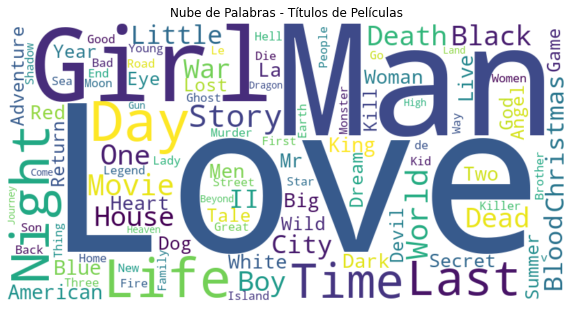

In [5]:
# Mostramos la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Películas')
plt.show()

In [6]:
# Importo estas dos técnica de la librería sklearn que son usadas para modelos de recomendación de películas, la primera permite convertir texto
# de películas en características numéricas, los algoritmos lo utlizan para calcular similitud entre películas y hacer recomendacines más precisas.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  # mide la similitud de las películas utilizando las similitud del coseno entre sus vectores
                                                        # de características numéricas.

In [7]:
# Para mi modelo de recomendación me quedaré con las columnas 'overview', 'popularity','title', 'name_genres'
df = df[['overview', 'popularity','title', 'generos_name']]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   overview      44438 non-null  object
 1   popularity    45377 non-null  object
 2   title         45376 non-null  object
 3   generos_name  42995 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [8]:
df.head(1)

,overview,popularity,title,generos_name
0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,"Animation, Comedy, Family"


In [9]:
df.to_csv('movies_dataset_ML.csv')

In [10]:
df_ML = pd.read_csv('movies_dataset_ML.csv')

In [11]:
df_ML.shape

(45379, 5)

In [12]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    45379 non-null  int64 
 1   overview      44438 non-null  object
 2   popularity    45377 non-null  object
 3   title         45376 non-null  object
 4   generos_name  42995 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
# Eliminamos las filas que contengan nulos.
df_ML.dropna(inplace=True)

In [14]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42298 entries, 0 to 45376
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    42298 non-null  int64 
 1   overview      42298 non-null  object
 2   popularity    42298 non-null  object
 3   title         42298 non-null  object
 4   generos_name  42298 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [15]:
# El dataset es muy grande, por lo tanto para que no nos genere error, cogeremos una muestra de los primeros 10.000 datos
df_subset = df_ML.head(5000)

In [ ]:
# Guardamos este subconjunto en un nuevo csv, que será nuestro dataset para el modelo a crear.
df_subset.to_csv('movies_ML_parcial.csv')

In [23]:
# Leemos el nuevo csv
movies_ML = pd.read_csv("movies_ML_parcial.csv")

In [24]:
movies_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  5000 non-null   int64  
 1   Unnamed: 0    5000 non-null   int64  
 2   overview      5000 non-null   object 
 3   popularity    5000 non-null   float64
 4   title         5000 non-null   object 
 5   generos_name  5000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [25]:
# Eliminar la columna "Unnamed: 0"
movies_ML = movies_ML.drop("Unnamed: 0", axis=1)

In [26]:
movies_ML.head(1)

,Unnamed: 0.1,overview,popularity,title,generos_name
0,0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,"Animation, Comedy, Family"


In [28]:
movies_ML = movies_ML.drop("Unnamed: 0.1", axis=1)

In [29]:
movies_ML.head(1)

,overview,popularity,title,generos_name
0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,"Animation, Comedy, Family"


In [30]:
# Creo una matriz TF-IDF para el texto del título de las películas
stopwords_custom = ["where","on","the", "at", "in", "of","and"]  # Agrega aquí stopwords personalizados\n",
tfidf = TfidfVectorizer(stop_words=stopwords_custom)
tfidf_matrix = tfidf.fit_transform(movies_ML['title']+' '+ movies_ML['overview']) # Ajustamos el modelo y lo transformamos de una manera adecuada
                                                                                 # al modelo.

In [32]:
from sklearn.metrics.pairwise import linear_kernel
# Calculamos con linear_kernel la similitud del coseno entre los títulos de las películas
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
def recomendacion(titulo):
    # Verifico si el título está en el DataFrame
    if titulo not in movies_ML['title'].values:
       return f"No se encontró ninguna película con el título '{titulo}'."

    # Debemos encontrar el índice de la película con el título dado
    indices = pd.Series(movies_ML.index, index=movies_ML['title']).drop_duplicates()
    idx = indices[titulo]

   # Calculamos las puntuaciones de similitud de todas las películas con la película dada
    sim_scores = list(enumerate(cosine_similarities[idx]))

    # Ordeno las películas por puntaje de similitud en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener los índices de las películas más similares (excluyendo la película dada)
    sim_scores = sim_scores[1:6]  # Obtener las 5 películas más similares
    movie_indices = [x[0] for x in sim_scores]

    # Se nos devuelve los títulos de las películas más similares
    respuesta_recomendacion = movies_ML['title'].iloc[movie_indices].tolist()

    return respuesta_recomendacion


    

In [35]:
titulo_pelicula = "Nixon"  # Ejemplo de un título
resultado = recomendacion(titulo_pelicula)
print(resultado)


['Dick', 'American Movie', 'The Greatest Story Ever Told', 'Point Break', '8½']
